In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

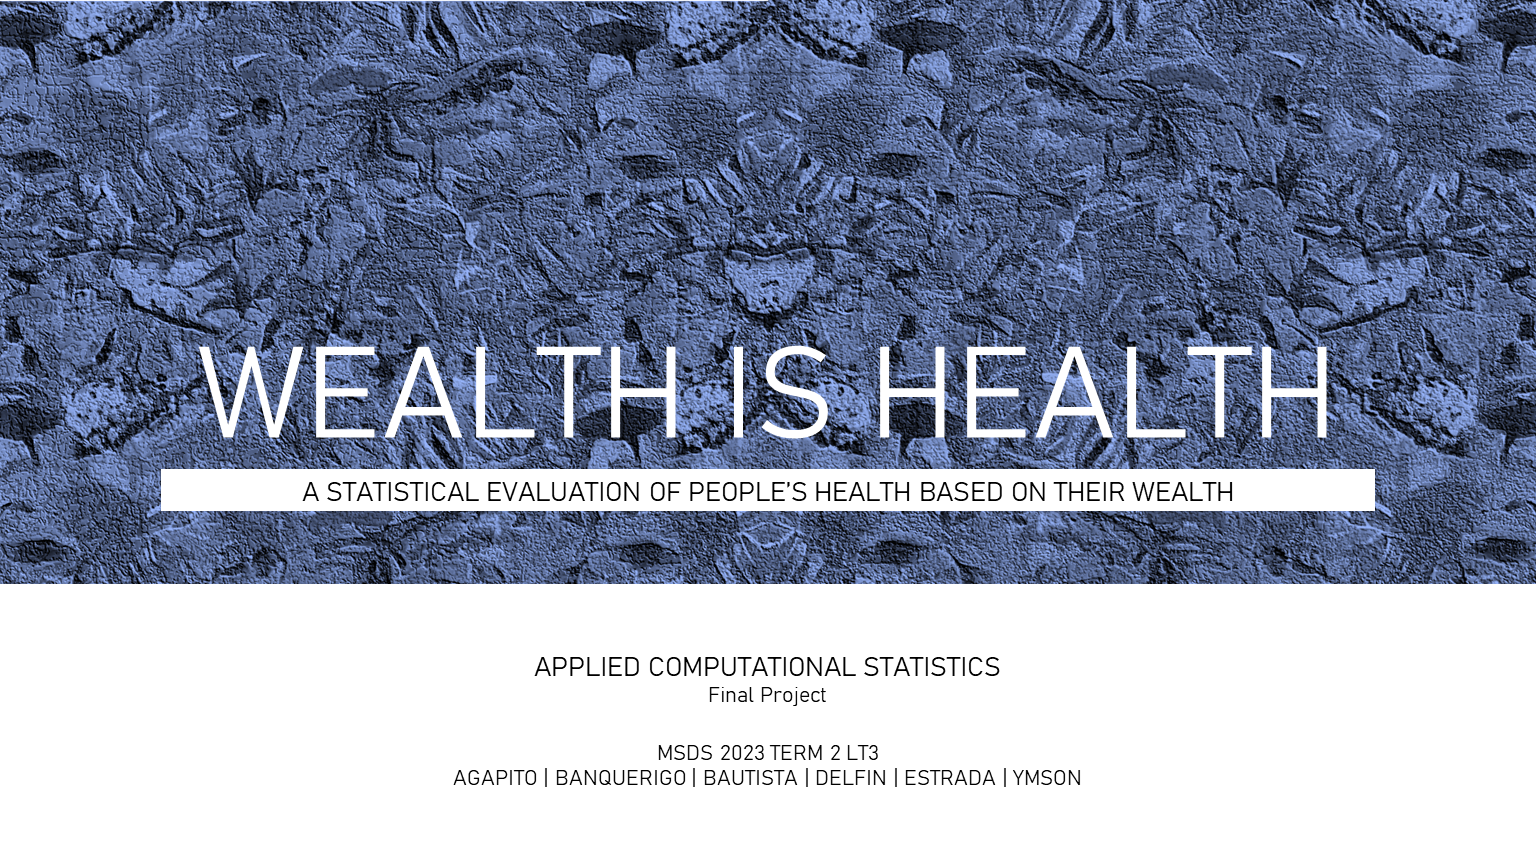

## Executive Summary
This project aims to do statistical analyses on the relationship between health and wealth within the Filipino population. This demonstrates how statistics can be used to analyze survey data. In situations where several uncertainties and outcomes may occur, the team quantified the chance or likelihood associated with various outcomes. The data set used is from The DHS (Demographic and Health Surveys) Program of USAID, and the latest result of the survey is from 2017 for the Philippines. 

From an initial check of the dataset, the team only have to perform minimal work on encoding and dropping of columns. Afterwards, the team proceeded with doing exploratory data analysis (EDA) to gain an understanding of the survey patterns and gather insights. The team also applied the needed statistical tests because we do not do eyeballing in ACS 😎. The results from the tests were interpreted based on the set hypotheses for each.

The great thing with the results is that there are statistically significant relationships between proxies for living conditions and health from relating ownership of a refrigerator and toilet with health, the mean percentage of sick people across wealth indices, and an independence test between wealth index and access to healthcare products and services.

This study can provide value to health organizations/workers, informing them where to focus their resources in aiding the indigent segment. Everyone can also learn from the study as the team can inform people how households with gadgets (particularly mobile phones) are more likely to get sick. The team can also potentially dig deeper into variables about gadget usage and relate it to this study, should data of the same granularity be available.

In terms of significance, the team believes that the project utilized enough data points to say that the output of the statistical tests performed are conclusive. Please take note that the team's interpretations are based on online research and personal opinions. There is no domain expert within the team. Further analysis from domain experts may be needed to say how conclusive the tests were and how relevant they are to the field. 

## Data Description
The study makes use of the results of the 2017 survey conducted by the Demographic and Health Survey (DHS) Program for Filipino respondents, implemented through the Philippine Statistics Authority (PSA). Specifically, the team looked at survey results from 27,496 respondents for questions addressed to households. There are a total of 338 questions gravitating towards wealth indicators such as financial capabilities and assets, and health indicators such as frequency of sickness and knowledge of common diseases. Table 1 shows the features that the group explored in the study.
<br>
<br>
<center><strong>Table 1.</strong> Explored features within the dataset</center>

|<center>Variable Code</center>|<center>Description</center>| <center>Data Type</center>|
|:---|:---|:---|
|`SHPROV`|Province code|TEXT|
|`HV270`|Wealth index combined|TEXT|
|`HV009`|Number of household members|TEXT|
|`SH201`|In the last 30 days, has any member of your household been sick or injured|TEXT|
|`SH202`|Number of sick/injured person|TEXT|
|`HV243E`|Has a computer|TEXT|
|`HV243A`|Has a mobile telephone|TEXT|
|`HV225`|Share toilet with other households|TEXT|
|`HV209`|Has refrigerator|TEXT|
|`SH206`|Visited  health facility for consultation/advise or treatment in the last 30 days|TEXT|
|`SH303`|Did you avail /purchase any medicines or vitamins in the last 30 days|TEXT|


## Scope & Limitations
**In Scope.** Philippines Standard DHS 2017 survey dataset for household downloaded from the DHS website<br>
**Out of Scope.** Other external factors not included in the survey​

## Introduction

### Background
The Demographic and Health Surveys (DHS) Program is a program initiated by the United States Agency for International Development(USAID) with the purpose of helping developing countries overcome problems related to poverty, health, climate change and democratic movements. In operation since 1984, its mission is to collect, analyze and disseminate accurate and representative data on population, health, HIV, and nutrition through more than 400 surveys in over 90 countries. The DHS Program has developed standard procedures, methodologies, and manuals to guide the survey process. Multiple steps were followed to ensure that the data properly reflect the situations they intend to describe and that data are comparable across countries. Health information is collected through interviews with men and women, as well as collection of biological samples to test for malaria, vitamin deficiencies, and many other health conditions. These DHS services are also extended to the Philippines.


The Philippines is no stranger to poor health conditions, poverty, and domestic plight. With the latest survey conducted in 2017, around 23% of Filipinos are considered to be living below the poverty line. And with this condition, it is to be expected that the quality of life, namely in, health and access to hospitals, access to electricity and clean water, access to housing,  and living area will severely be limited. 

As such, these surveys prove to be an important tool in overseeing and monitoring the country's current development towards these key areas of health, wealth, security, and progressiveness as a society. It provides a measuring stick to which the country can see how they improved over the course of the year and in what areas can they further improve upon. 

These surveys can also provide valuable insights about the relationships of different conditions and situations. Does having access to electricity and water mean better health? Is there a relationship between the different chronic diseases and the economic status of the people? Finding answers to questions like these provide valuable insights that can be used for policy-making and prioritization of government programs to alleviate the hardships encountered by the Filipino people.


### Objectives
This project aims to look at the relationship between health and wealth indicators among indigent (poor) and well-to-do (non-poor) in the Filipino population. The following specific objectives will be addressed by the report.
- Describe sick and poor households across provinces in the Philippines
- Examine the relationship between wealth and sickness
- Look into the independence of wealth and health service availment
- Determine the difference between how poor and non-poor population experience sickness

## Methodology

Figure below describes our methodology pipeline for the project. Each stage of the methodology is discussed in this section.

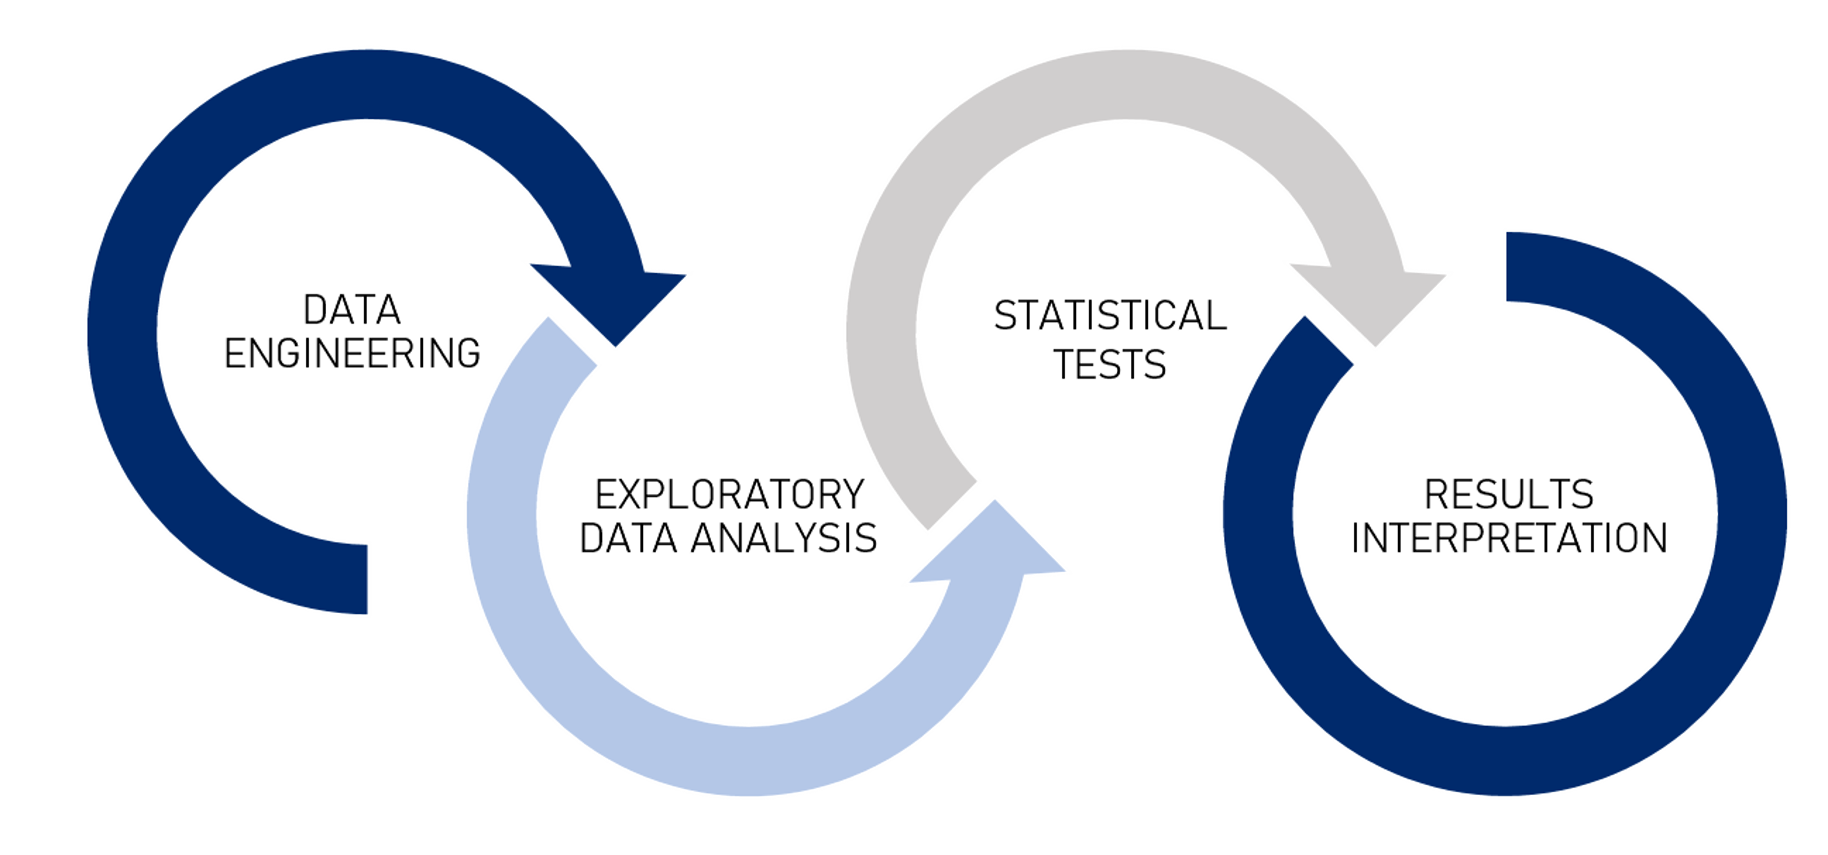

### Step 1: Data Engineering
-	After an initial check of the dataset, the team have confirmed that the quality of the data is already good for usage.
-	The team only performed encoding of the labels for each categorical column to make EDA charts easier to interpret.
-	Columns not relevant to the analysis have been dropped. From 2k+ columns, only 338 columns were retained for ease of data processing.

### Step 2: Exploratory Data Analysis (EDA)
-	The team performed an EDA specific to the Wealth Index of each household. 
-	EDA charts include regional graphs, scatter plots for the wealth index of each region, bar graphs for household distribution, and data frames for % of poor households in top regions. These easily visualize the data for insights generation.

### Step 3: Statistical Tests
-	In this process, the team performed a deeper analysis of on the data set focused on the EDA results presented. 
-	There were 3 key insights, and the team has set hypotheses tests for each of them.
-	Statistical tests used include one-tailed t-tests, chi-squared test for independence, ANOVA, and Tukey-HSD. Resampling techniques were also applied to provide interval estimates for some statistics.

### Step 4: Results Interpretation
-	A critical part of the methodology is to make inferences from the results of the statistical tests. In this notebook, the conclusions made for each test is backed up with the results generated.

## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import pyreadstat
import json
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm, trange

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-uomsvmr7 because the default path (/home/pestrada/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


Here is a preview of our dataset. Column names are coded, so we will be giving brief descriptions of the column variables used for each analysis as we go along.

In [3]:
# !pip install pyreadstat

In [4]:
filename = 'PHHR71FL'

_, meta = pyreadstat.read_sav(f'{filename}.SAV')
            
df = pd.read_csv(f'{filename}-labeled-clean.csv')
df.head()

,HHID,HV000,HV001,HV002,HV003,HV004,HV005,HV006,HV007,HV008,HV008A,HV009,HV010,HV012,HV013,HV014,HV015,HV016,HV017,HV018,HV020,HV021,HV022,HV023,HV024,HV025,HV027,HV028,HV030,HV042,HV044,HV045A,HV045B,HV045C,HV046,HV801,HV802,HV803,HV201,HV202,HV201A,HV204,HV205,HV206,HV207,HV208,HV209,HV210,HV211,HV212,...,SH508X,SH509,SH510A,SH510B,SH510C,SH510D,SH510E,SH510F,SH510G,SH510H,SH510I,SH510J,SH510K,SH510L,SH510M,SH510N,SH510O,SH510X,SH510Z,SH511A,SH511B,SH511C,SH511D,SH511E,SH511F,SH511G,SH511H,SH511I,SH511J,SH511K,SH511L,SH511M,SH512H,SH512I,SH512J,SH511X,SH511Z,SH512A,SH512B,SH512C,SH512D,SH512E,SH512F,SH512G,SH512X,SH512Z,SH513,SH514,SH515,SHNUMDV
0,10001,PH7,1.0,1.0,1.0,1.0,364301.0,8.0,2017.0,1412.0,42961.0,8.0,2.0,8.0,8.0,1.0,Completed,14.0,1.0,8300.0,All woman sample,1.0,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0,8300.0,Not selected,Household selected,Tagalog,Tagalog,Yakan,No,1448.0,1527.0,39.0,Piped into dwelling,NaN,"No, not interrupted for a full day",On premises,Flush to septic tank,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,2.0
1,10002,PH7,1.0,2.0,4.0,1.0,364301.0,8.0,2017.0,1412.0,42964.0,5.0,2.0,5.0,5.0,1.0,Completed,17.0,1.0,8303.0,All woman sample,1.0,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0,8300.0,Not selected,Household selected,Tagalog,Tagalog,Ivatan,No,1017.0,1045.0,28.0,Bottled water,Piped into dwelling,"No, not interrupted for a full day",On premises,Flush to septic tank,Yes,No,Yes,Yes,Yes,Yes,Yes,...,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,Yes,No,2.0
2,10004,PH7,1.0,4.0,2.0,1.0,364301.0,8.0,2017.0,1412.0,42963.0,4.0,1.0,4.0,4.0,0.0,Completed,16.0,1.0,8303.0,All woman sample,1.0,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0,8300.0,Not selected,Household selected,Tagalog,Tagalog,Maranao,No,1455.0,1513.0,18.0,Bottled water,Piped into dwelling,"No, not interrupted for a full day",On premises,Flush to septic tank,Yes,No,Yes,No,No,No,No,...,No,Yes,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,2.0
3,10007,PH7,1.0,7.0,2.0,1.0,364301.0,8.0,2017.0,1412.0,42962.0,5.0,1.0,5.0,5.0,2.0,Completed,15.0,1.0,8302.0,All woman sample,1.0,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0,8300.0,Not selected,Household selected,Tagalog,Tagalog,Tausog,No,911.0,937.0,26.0,Piped to neighbor,NaN,Don't know,On premises,Flush to septic tank,Yes,No,No,No,No,No,No,...,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,No,No,2.0
4,10008,PH7,1.0,8.0,1.0,1.0,364301.0,8.0,2017.0,1412.0,42961.0,11.0,0.0,11.0,9.0,0.0,Completed,14.0,1.0,8303.0,All woman sample,1.0,BASILAN,"BUCAY, ABRA",Autonomous Region in Muslim Mindanao,Rural,Not selected,0.0,8300.0,Not selected,Household selected,Tagalog,Tagalog,Tausog,Yes,1432.0,1510.0,38.0,Piped into dwelling,NaN,"No, not interrupted for a full day",On premises,Composting toilet,Yes,No,Yes,No,Yes,No,No,...,No,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,Yes,Yes,No,10.0


In [5]:
print(f'Again, the dataset contains information about {df.shape[0]} Filipino households.')

Again, the dataset contains information about 27496 Filipino households.


In [6]:
def print_column_labels(meta, df, col=None):
    '''Prints column labels of the columns in the print variable'''
    if col is None:
        for k,v in meta.column_names_to_labels.items():
            if k in df.columns:
                print(k, v)
    elif type(col)==list:
        for i in col:
            print(i, meta.column_names_to_labels[i])
    else:
        print(col, meta.column_names_to_labels[col])

### Health & poverty per province

In [7]:
shapefile = gpd.read_file('geo/provinces/Provinces.shp')
shapefile["x"] = shapefile.geometry.centroid.x
shapefile["y"] = shapefile.geometry.centroid.y

shp_recode = {'Shariff Kabunsuan': 'Davao Occidental'}
shapefile['PROVINCE_'] =  shapefile['PROVINCE'].apply(lambda x: x.title()).replace(shp_recode)

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [8]:
def plot_province(merged_data, variable, color='Reds'):
    '''Map values of the variable for the different provinces'''
    vmin, vmax = merged_data[variable].min(), merged_data[variable].max()

    fig, ax = plt.subplots(1, figsize=(15, 10))

    merged_data.plot(column=variable, cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', vmin=vmin, vmax=vmax)

    plt.xlim(115,130)
    plt.ylim(0,25)

    sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = fig.colorbar(sm)

In [9]:
def province_recode(df, prov_col):
    '''Recoding province info'''
    df_recode = {'Isabela City' : 'Basilan',
         'Cotabato City': 'Maguindanao',
         'Caloocan/Malabon/Navotas/Valenzuela': 'Metropolitan Manila',
         'Las Pinas/Makati/Muntinlupa/Paranaque/Pasay/Taguig/Pateros': 'Metropolitan Manila',
         'Mandaluyong/Marikina/Pasig/San Juan/Quezon City': 'Metropolitan Manila',
         'Manila': 'Metropolitan Manila',
         'Cebu (Inc Cities)':'Cebu',
         'Samar (Western)':'Samar',
         'Compostella Valley':'Compostela Valley',
         'Cotabato (North)':'North Cotabato'
    }

    df[prov_col] = df[prov_col].apply(lambda x: x.title()).replace(df_recode)
    return df

df = province_recode(df, 'SHPROV')

This part of the exploratory data analysis considers the following variables.

In [10]:
print_column_labels(meta, df, col=['SHPROV', 'HV270', 'HV009', 'SH201', 'SH202'])

SHPROV Province code
HV270 Wealth index combined
HV009 Number of household members
SH201 In the last 30 days, has any member of your household been sick or injured
SH202 Number of sick/injured persons


#### Proportion of sick population

From the population of surveyed households, about 15 percent are sick.

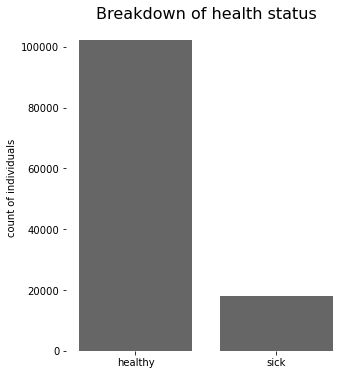

In [11]:
n_sick = df['SH202'].sum()
n_healthy = df['HV009'].sum() - n_sick

health = pd.Series({'healthy': n_healthy, 'sick': n_sick})

fig, ax = plt.subplots(figsize=(5,6))

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

plt.bar(health.index, health.values, color='#666666', width=0.8)

plt.title('Breakdown of health status', fontsize=16)
plt.ylabel('count of individuals')
plt.show()

In [12]:
sim_size = 100
n = len(df) 

sick_props = list()

for i in trange(sim_size):    
    samp_ind = np.random.choice(range(n), size=n, replace=True)
    temp = df.iloc[samp_ind].copy()
    temp_prop = temp['SH202'].sum() / temp['HV009'].sum()
    sick_props.append(temp_prop)

sick_prop_estimate = df['SH202'].sum() / df['HV009'].sum()
sick_prop_interval = np.nanquantile(sick_props, [0.025, 0.975])

print(f'Point estimate, proportion of sick people: {sick_prop_estimate}')
print(f'95% Interval estimate, proportion of sick people: {sick_prop_interval}')

  0%|          | 0/100 [00:00<?, ?it/s]

Point estimate, proportion of sick people: 0.1504078222044848
95% Interval estimate, proportion of sick people: [0.1477251  0.15312731]


In [13]:
temp = df[['SHPROV', 'HV270', 'HV009', 'SH201', 'SH202']].copy()

sick = temp.groupby('SHPROV', as_index=False).agg(population=('HV009',sum), sick=('SH202', sum))
sick['sick_prop'] = sick['sick'] / sick['population']

The graph below shows a map of proportion of sick people across the 82 provinces in the Philippines.

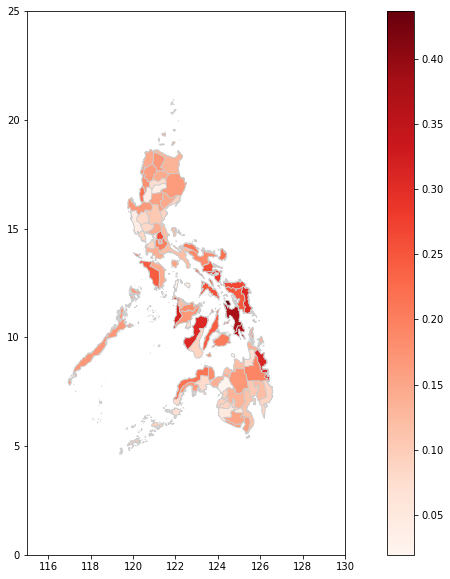

In [14]:
sick_graph_df = pd.merge(shapefile, sick, left_on = 'PROVINCE_', right_on = 'SHPROV')
plot_province(sick_graph_df, 'sick_prop')

The top 5 provinces with the highest proportion of sick individuals (at least 30 percent) are `Biliran`, `Leyte`, `Southern Leyte`, `Antique`, and `Surigao Del Sur`.

In [15]:
sick.sort_values('sick_prop', ascending=False).head(5)

,SHPROV,population,sick,sick_prop
13,Biliran,1173.0,512.0,0.436488
43,Leyte,1786.0,675.0,0.377940
71,Southern Leyte,1235.0,454.0,0.367611
5,Antique,1258.0,399.0,0.317170
75,Surigao Del Sur,1290.0,405.0,0.313953


Provinces with the least proportion of sick individuals (at most ~4 percent) are `Romblon`, `Benguet`, `Ifugao`, `Lanao Del Sur`, `Camiguin`.

In [16]:
sick.sort_values('sick_prop', ascending=False).tail(5)

,SHPROV,population,sick,sick_prop
65,Romblon,1160.0,42.0,0.036207
12,Benguet,1726.0,62.0,0.035921
33,Ifugao,1343.0,46.0,0.034252
42,Lanao Del Sur,1940.0,47.0,0.024227
20,Camiguin,1231.0,24.0,0.019496


#### Proportion of poor households

Looking at the wealth index breakdown, biggest categories are the poorest and poorer households. In a black and white POV, about 50 percent of the total surveyed households are considered poor.

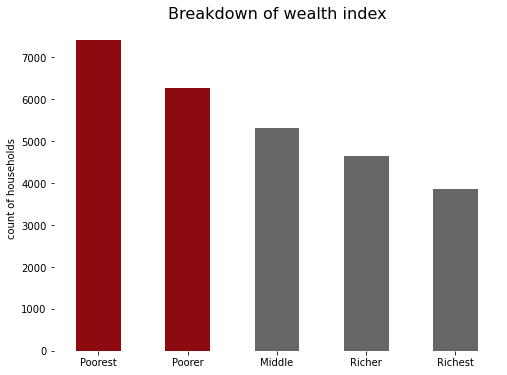

In [17]:
fig, ax = plt.subplots(figsize=(8,6))

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

df['HV270'].value_counts().plot(kind='bar', color=['#8d0a11']*2 + ['#666666']*3)

plt.title('Breakdown of wealth index', fontsize=16)
plt.ylabel('count of households')
plt.xticks(rotation=0)
plt.show()

In [18]:
poor_labels = ['Poorer', 'Poorest']

sim_size = 100
n = len(df) 

poor_props = list()

for i in trange(sim_size):    
    samp_ind = np.random.choice(range(n), size=n, replace=True)
    temp = df.iloc[samp_ind].copy()
    temp_poor = temp[temp['HV270'].isin(poor_labels)]
    temp_prop = len(temp_poor) / n
    poor_props.append(temp_prop)

poor = df[df['HV270'].isin(poor_labels)].copy()
poor_prop_estimate = len(poor) / len(df)

poor_prop_interval = np.nanquantile(poor_props, [0.025, 0.975])

print(f'Point estimate, proportion of poor households: {poor_prop_estimate}')
print(f'95% Interval estimate, proportion of poor households: {poor_prop_interval}')

  0%|          | 0/100 [00:00<?, ?it/s]

Point estimate, proportion of poor households: 0.4971268548152459
95% Interval estimate, proportion of poor households: [0.49065682 0.50323683]


In [19]:
poor_labels = ['Poorer', 'Poorest']

temp = df[['HHID','SHPROV', 'HV270', 'HV009', 'SH201', 'SH202']].copy()

hh = temp.groupby('SHPROV', as_index=False).agg(households=('HHID', 'count'))
poor = temp[temp['HV270'].isin(poor_labels)].groupby('SHPROV', as_index=False).agg(poor=('HHID', 'count'))

poor = pd.merge(poor, hh, on='SHPROV')
poor['poor_prop'] = poor['poor'] / poor['households']

The map below shows the distribution of the poorest households in the Philippines. Poorer provinces are in the southern part of the country.

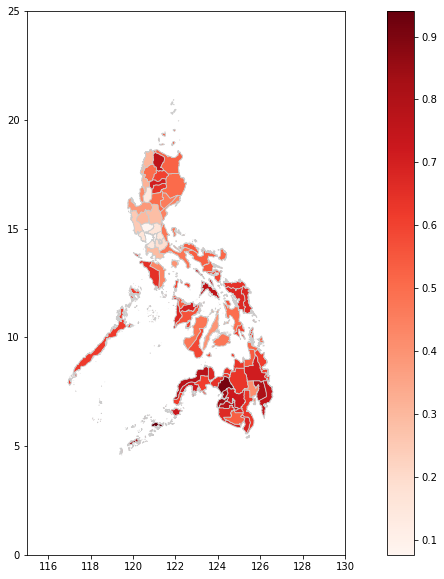

In [20]:
poor_graph_df = pd.merge(shapefile, poor, left_on = 'PROVINCE_', right_on = 'SHPROV')
plot_province(poor_graph_df, 'poor_prop')

Poorest provinces are `Sulu`, `Lanao Del Sur`, `Davao Occidental`, `Tawi-Tawi`, and `Compostella Valley`.

In [21]:
poor.sort_values('poor_prop', ascending=False).head(5)

,SHPROV,poor,households,poor_prop
73,Sulu,300,319,0.940439
42,Lanao Del Sur,315,345,0.913043
28,Davao Occidental,248,294,0.843537
77,Tawi-Tawi,179,213,0.840376
25,Compostela Valley,216,267,0.808989


Least poor provinces (and region) are `Benguet`, `Cavite`, `Batanes`, `Metro Manila`, and `Pampanga`.

In [22]:
poor.sort_values('poor_prop', ascending=False).tail(5)

,SHPROV,poor,households,poor_prop
12,Benguet,65,473,0.137421
23,Cavite,36,262,0.137405
10,Batanes,25,248,0.100806
47,Metropolitan Manila,190,2383,0.079731
60,Pampanga,29,383,0.075718


A simple quadrant analysis of health and wealth disposition of the different provinces can tell us which specific province needs what kind of assistance. Provinces with relatively high sick AND poor proportions should be priority in terms of aid. 

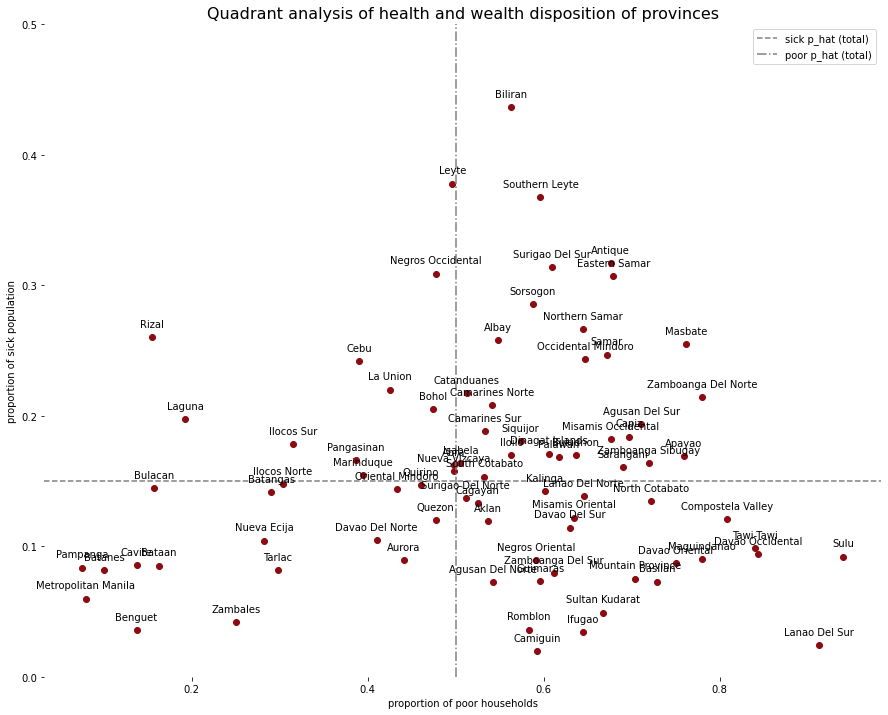

In [23]:
fig, ax = plt.subplots(figsize=(15,12))

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

plt.scatter(poor['poor_prop'], sick['sick_prop'], color='#8d0a11')
plt.axhline(y = 0.15, color = 'grey', linestyle = '--', label='sick p_hat (total)')
plt.axvline(x = 0.5, color = 'grey', linestyle = '-.', label='poor p_hat (total)')

for label, x, y, in zip(poor['SHPROV'], poor['poor_prop'], sick['sick_prop']):
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points", 
                 xytext=(0,10),
                 ha='center')
    
plt.title('Quadrant analysis of health and wealth disposition of provinces', fontsize=16)
plt.ylabel('proportion of sick population')
plt.xlabel('proportion of poor households')

plt.legend()
plt.ylim(0,0.5)
plt.xticks(rotation=0)
plt.show()

### Difference in proportion of sick population between poor and non-poor households

For this portion, we test if there is a significant difference between the proportion of sick people among poor and non-poor population. The idea is to test if poverty contributes to people's sickness. The null hypothesis is that there is no difference in the proportion of sick people among poor and non-poor. The alternative hypothesis is that there are more sick people among the poor population.

\begin{equation}
H_0:\,\hat{p}_{\rm poor} = \hat{p}_{\rm non-poor} \\
H_1:\,\hat{p}_{\rm poor} > \hat{p}_{\rm non-poor}
\end{equation}

In [24]:
poor_labels = ['Poorer', 'Poorest']

temp_poor = df[df['HV270'].isin(poor_labels)].copy()
n_poor_sick = temp_poor['SH202'].sum()
n_poor = temp_poor['HV009'].sum()

p_poor_sick_hat = n_poor_sick/n_poor
obs_poor = np.array([1]*int(n_poor_sick) + [0]*int(n_poor - n_poor_sick))

print(f'Estimated proportion of sick people among poor population: {p_poor_sick_hat}')

Estimated proportion of sick people among poor population: 0.1623887548864676


In [25]:
temp_nonpoor = df[~df['HV270'].isin(poor_labels)].copy()
n_nonpoor_sick = temp_nonpoor['SH202'].sum()
n_nonpoor = temp_nonpoor['HV009'].sum()

p_nonpoor_sick_hat = n_nonpoor_sick/n_nonpoor
obs_nonpoor = np.array([1]*int(n_nonpoor_sick) + [0]*int(n_nonpoor - n_nonpoor_sick))
print(f'Estimated proportion of sick people among non-poor population: {p_nonpoor_sick_hat}')

Estimated proportion of sick people among non-poor population: 0.13843545330629342


From our checks of the standard errors below, we need to account for an unequal variance in our t-test.

In [26]:
sim_size = 100
n = len(temp_poor) 

sick_props = list()

for i in trange(sim_size):    
    samp_ind = np.random.choice(range(n), size=n, replace=True)
    temp = temp_poor.iloc[samp_ind].copy()
    temp_prop = temp['SH202'].sum() / temp['HV009'].sum()
    sick_props.append(temp_prop)

print(f'Standard Error, proportion of poor sick people: {np.std(sick_props, ddof=1):.6f}')

  0%|          | 0/100 [00:00<?, ?it/s]

Standard Error, proportion of poor sick people: 0.002203


In [27]:
sim_size = 100
n = len(temp_nonpoor) 

sick_props = list()

for i in trange(sim_size):    
    samp_ind = np.random.choice(range(n), size=n, replace=True)
    temp = temp_nonpoor.iloc[samp_ind].copy()
    temp_prop = temp['SH202'].sum() / temp['HV009'].sum()
    sick_props.append(temp_prop)

print(f'Standard Error, proportion of non-poor sick people: {np.std(sick_props, ddof=1):.6f}')

  0%|          | 0/100 [00:00<?, ?it/s]

Standard Error, proportion of non-poor sick people: 0.001845


Looking at the results of our t-test, we have sufficient evidence to reject the null hypothesis that the proportions of sick people among poor and non-poor population are equal. More poor people get sick than non-poor.

In [28]:
from statsmodels.stats.weightstats import ztest, ttest_ind

tstat, pvalue, dof = ttest_ind(obs_poor, obs_nonpoor, usevar='unequal', value=0, alternative='larger')

print(f't-stat = {tstat}')
print(f'p-value = {pvalue}')
print(f'degrees of freedom = {dof}')
print('')
print(f'The p-value {pvalue:.8f} is less than alpha=0.05. We reject the null.')

t-stat = 11.625430827891865
p-value = 1.5905573263483884e-31
degrees of freedom = 119744.39125780623

The p-value 0.00000000 is less than alpha=0.05. We reject the null.


To build on our insight that more poor people get sick than non-poor, we also related the living conditions to the mean number of sick people per household. We look at the following variables in our next set of insights.

In [29]:
print_column_labels(meta, df, col=['SH202', 'HV243E', 'HV243A', 'HV225', 'HV209'])

SH202 Number of sick/injured persons
HV243E Has a computer
HV243A Has mobile telephone
HV225 Share toilet with other households
HV209 Has refrigerator


In [30]:
sick_last30days = df['SH202'].fillna(0)
has_ref = df['HV209']
has_toilet = df['HV225']
has_mobile = df['HV243A']
has_pc = df['HV243E']

features = {'has_toilet': has_toilet,
            'sick_last30days': sick_last30days,
            'has_mobile': has_mobile,
            'has_pc': has_pc,
            'has_ref': has_ref}

temp = pd.DataFrame(features)

#### Refrigerator and own toilet vs. occurrence of sickness

We check if having a refrigerator in households affects the occurrence of sickness in the household. The idea is that a refrigerator would help food spoil less and hence would lead to less cases of diarrhea and food poisoning. From the feature of the number of household members that got sick in the last 30 days, the values were grouped according to whether the household has refrigerator or not. The null hypothesis is that there is no difference in the mean values of the number of sick members in the two groups. The alternative hypothesis is that the group of households with a refrigerator has a smaller mean value for the number of sick members. 

\begin{equation}
H_0:\,\mu_{\rm yes} = \mu_{\rm no} \\
H_1:\,\mu_{\rm yes} < \mu_{\rm no}
\end{equation}

We also check if sharing toilets affects the occurrence of sickness. The same null hypothesis was used and only the inequality in the alternative hypothesis differs. The idea here is that toilets are breeding grounds for bacteria and viruses, and the sharing of toilets increases the chances of one household catching the sickness of another household.

\begin{equation}
H_0:\,\mu_{\rm yes} = \mu_{\rm no} \\
H_1:\,\mu_{\rm yes} > \mu_{\rm no}
\end{equation}

We perform a t-test to either reject or fail to reject the null hypotheses. Since the dataset is large, there is no need to check if the samples follow a normal distribution.

In [31]:
no_ref = temp[temp['has_ref'] == 'No']['sick_last30days']
yes_ref = temp[temp['has_ref'] == 'Yes']['sick_last30days']

no_toilet = temp[temp['has_toilet'] == 'No']['sick_last30days']
yes_toilet = temp[temp['has_toilet'] == 'Yes']['sick_last30days']

**Null Hypothesis:** Owning a refrigerator does not affect the mean value of the number of sick household members in the last 30 days.<br>
**Alternative Hypothesis:** Household with refrigerators have smaller mean count of sick household members.​

In [32]:
tstat, pvalue, dof = ttest_ind(yes_ref, no_ref, alternative='smaller', usevar='unequal')

print(f't-stat = {tstat}')
print(f'p-value = {pvalue}')
print(f'degrees of freedom = {dof}')
print('')
print(f'The p-value {pvalue:.8f} is less than alpha=0.05. We reject the null.')

t-stat = -5.75973274244625
p-value = 4.267149804733681e-09
degrees of freedom = 22537.023082409316

The p-value 0.00000000 is less than alpha=0.05. We reject the null.


**Null Hypothesis:** Sharing a toilet with other households does not affect the mean value of the number of sick household members in the last 30 days.<br>
**Alternative Hypothesis:** Households who share toilet with others have higher mean count of sick household members.​

In [33]:
tstat, pvalue, dof = ttest_ind(yes_toilet, no_toilet, alternative='larger', usevar='unequal')

print(f't-stat = {tstat}')
print(f'p-value = {pvalue}')
print(f'degrees of freedom = {dof}')
print('')
print(f'The p-value {pvalue:.8f} is less than alpha=0.05. We reject the null.')

t-stat = 2.332413881544681
p-value = 0.009854313024129912
degrees of freedom = 6647.390145165684

The p-value 0.00985431 is less than alpha=0.05. We reject the null.


The p-value for both tests are low. If we set $\alpha=0.05$, then we reject the two null hypotheses, meaning those households with refrigerators and those who do not share their toilets with other households get sick less.

#### Electronic Gadgets vs. occurrence of sickness

We also check if the presence of electronic gadgets in the household, starting with mobile phones, decreases the occurrence of sickness in the household. The idea is that electronic gadgets can be an indicator of wealth and thus of whether the household can invest on sanitation that would prevent its members from getting sick. From the feature of the number of household members that got sick in the last 30 days, the values were grouped according to whether the household has at least one mobile phone or not. The null and alternative hypotheses are similar to the previous hypotheses, but placed in the context of electronic gadgets. The same test was repeated but using the data of whether the household has at least one computer or not.

We perform a t-test to either reject or fail to reject the null hypotheses. Again, since the dataset is large, there is no need to check if the samples follow a normal distribution.

In [34]:
no_mobile = temp[temp['has_mobile'] == 'No']['sick_last30days']
yes_mobile = temp[temp['has_mobile'] == 'Yes']['sick_last30days']

no_pc = temp[temp['has_pc'] == 'No']['sick_last30days']
yes_pc = temp[temp['has_pc'] == 'Yes']['sick_last30days']

**Null Hypothesis:** Owning a mobile phone does not affect the mean value of the number of sick household members in the last 30 days.<br>
**Alternative Hypothesis:** Households with mobile phone have a smaller mean value of the number of sick household members in the last 30 days.

In [35]:
tstat, pvalue, dof = ttest_ind(yes_mobile, no_mobile, alternative='smaller', usevar='unequal')

print(f't-stat = {tstat}')
print(f'p-value = {pvalue}')
print(f'degrees of freedom = {dof}')
print('')
print(f'The p-value {pvalue:.8f} is greater than alpha=0.05. We fail to reject the null.')

t-stat = 4.199910438347873
p-value = 0.9999864354170744
degrees of freedom = 5435.395226454881

The p-value 0.99998644 is greater than alpha=0.05. We fail to reject the null.


**Null Hypothesis:** Owning a mobile phone does not affect the mean value of the number of sick household members in the last 30 days.<br>
**Alternative Hypothesis:** Households with mobile phone have a larger mean value of the number of sick household members in the last 30 days.

In [36]:
tstat, pvalue, dof = ttest_ind(yes_mobile, no_mobile, alternative='larger', usevar='unequal')

print(f't-stat = {tstat}')
print(f'p-value = {pvalue}')
print(f'degrees of freedom = {dof}')
print('')
print(f'The p-value {pvalue:.8f} is less than alpha=0.05. We reject the null.')

t-stat = 4.199910438347873
p-value = 1.3564582925533634e-05
degrees of freedom = 5435.395226454881

The p-value 0.00001356 is less than alpha=0.05. We reject the null.


**Null Hypothesis:** Owning a computer does not affect the mean value of the number of sick household members in the last 30 days.<br>
**Alternative Hypothesis:** Households who own a computer have a smaller mean value of the number of sick household members.​

In [37]:
tstat, pvalue, dof = ttest_ind(yes_pc, no_pc, alternative='smaller', usevar='unequal', value=0)

print(f't-stat = {tstat}')
print(f'p-value = {pvalue}')
print(f'degrees of freedom = {dof}')
print('')
print(f'The p-value {pvalue:.8f} is less than alpha=0.05. We reject the null.')

t-stat = -6.167945397406634
p-value = 3.62930643444477e-10
degrees of freedom = 7901.996586208641

The p-value 0.00000000 is less than alpha=0.05. We reject the null.


At 0.05 level of significance, households with mobile phone have a larger mean value of the number of sick household members. Households who own a computer, on the other hand, have a smaller mean value of the number of sick household members. A computer can be considered as luxury, so households with computers are more likely to be able to afford good sanitation.

### Independence of availment of health services & wealth

In this portion of the discussion, we will use chi-squared test for independence to prove the relationship between wealth status and ability to purchase medicine and avail medical services. The following are the relevant variables for the chi-squared test.

In [38]:
print_column_labels(meta, df, col=['HV270', 'HV009', 'SH201', 'SH206', 'SH303'])

HV270 Wealth index combined
HV009 Number of household members
SH201 In the last 30 days, has any member of your household been sick or injured
SH206 Visited  health facility for consultation/advise or treatment In the last 30 days
SH303 Did you avail /purchase any medicines or vitamins in the last 30 days


Wealth status is NOT independent from health facility visits and purchase of medicine. While the rich may not be visiting health facilities by choice, most poor people do not visit health facilities due to cost considerations. In terms of medicine purchase, while more households have bought medicine or vitamins compared to facility visits, more poor people are not able to buy medicine compared to those who are well-off.

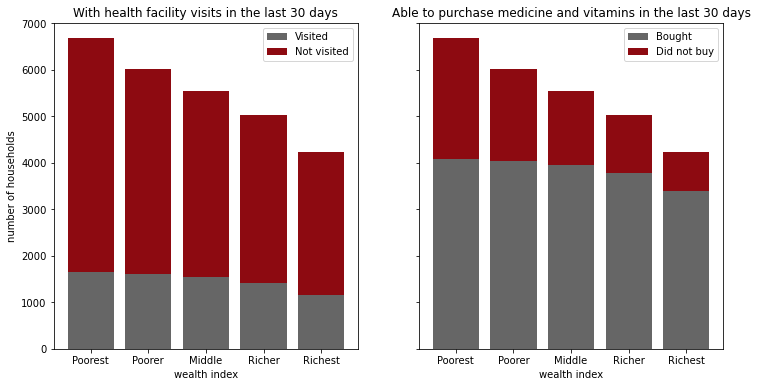

In [39]:
temp1 = df[['HV270A', 'SH206']].copy()
temp1['SH206'] = temp1['SH206'].replace({'Yes':1, 'No':0})
temp1 = pd.DataFrame([temp1.groupby('HV270A')['SH206'].count(), temp1.groupby('HV270A')['SH206'].sum()]).T
temp1.columns = ['total', 'yes']
temp1['no'] = temp1['total'] - temp1['yes']
temp1 = temp1.sort_values('total', ascending=False)

temp2 = df[['HV270A', 'SH303']].copy()
temp2['SH303'] = temp2['SH303'].replace({'Yes':1, 'No':0})
temp2 = pd.DataFrame([temp2.groupby('HV270A')['SH303'].count(), temp2.groupby('HV270A')['SH303'].sum()]).T
temp2.columns = ['total', 'yes']
temp2['no'] = temp2['total'] - temp2['yes']
temp2 = temp2.sort_values('total', ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)

ax[0].bar(temp1.index, temp1.yes, label='Visited', color='#666666')
ax[0].bar(temp1.index, temp1.no, bottom=temp1.yes, label='Not visited', color='#8d0a11')
ax[1].bar(temp2.index, temp2.yes, label='Bought', color='#666666')
ax[1].bar(temp2.index, temp2.no, bottom=temp2.yes, label='Did not buy', color='#8d0a11')

ax[0].legend()
ax[1].legend()

ax[0].set_xlabel('wealth index')
ax[0].set_ylabel('number of households')
ax[1].set_xlabel('wealth index')

ax[0].set_title("With health facility visits in the last 30 days")
ax[1].set_title("Able to purchase medicine and vitamins in the last 30 days")

plt.show()

**Null Hypothesis:** Wealth status and health facility visits for cosultation, advise or treatment are independent.

In [40]:
from scipy.stats import chi2

temp = df[['HV270A', 'SH206']].copy()
temp['SH206'] = temp['SH206'].map({'Yes':1, 'No':0})

obs = pd.crosstab(df['SH206'], df['HV270A']).to_numpy()
row_total = obs.sum(axis=1)
col_total = obs.sum(axis=0)

p_0 = row_total/row_total.sum()
expected = p_0[:, None]*col_total[None, :]

Q = np.sum(((obs - expected)**2)/expected)
print(f'Chi-Squared Statistic = {Q:.4f}')

r = obs.shape[0]
c = obs.shape[1]
k = r*c
degf = (r - 1)*(c - 1)
p_value = 1 - chi2.cdf(Q, degf)
print(f'p-value = {p_value:.4f}')

Chi-Squared Statistic = 24.9195
p-value = 0.0001


**Null Hypothesis:** Wealth status and purchase of medicine and vitamins are independent.

In [41]:
temp = df[['HV270A', 'SH303']].copy()
temp['SH303'] = temp['SH303'].map({'Yes':1, 'No':0})

obs = pd.crosstab(df['SH303'], df['HV270A']).to_numpy()
row_total = obs.sum(axis=1)
col_total = obs.sum(axis=0)

p_0 = row_total/row_total.sum()
expected = p_0[:, None]*col_total[None, :]

Q = np.sum(((obs - expected)**2)/expected)
print(f'Chi-Squared Statistic = {Q:.4f}')

r = obs.shape[0]
c = obs.shape[1]
k = r*c
degf = (r - 1)*(c - 1)
p_value = 1 - chi2.cdf(Q, degf)
print(f'p-value = {p_value:.4f}')

Chi-Squared Statistic = 547.5808
p-value = 0.0000


### Difference between how poor and non-poor population experience sickness

Tukey’s honestly significant difference (HSD) test performs pairwise comparison of means for a set of samples. <br>

\begin{align*}
    H_0 &: \mu_j = \mu_i \\ 
    H_1 &: \mu_j \neq \mu_i
\end{align*}

\begin{align*}
q = \frac{\bar{x}_{\rm max} -  \bar{x}_{\rm min}}{s.e.} \ {\rm where}\  s.e. = \sqrt{MS_w/n} \\
\end{align*}

\begin{align*}
t = \frac{\bar{x}_{\rm max} -  \bar{x}_{\rm min}}{\sqrt{2 \cdot MS_w/n} \\}
\end{align*}


The null hypothesis is that the distributions underlying the samples all have the same mean. The test statistic, which is computed for every possible pairing of samples, is simply the difference between the sample means. For each pair, the p-value is the probability under the null hypothesis of observing such an extreme value of the statistic, considering that many pairwise comparisons are being performed. Confidence intervals for the difference between each pair of means are also available.

$\alpha$ = 0.05

For this section, we will be using both ANOVA and `scipy.stats.tukey_hsd` (Tukey's HSD).

#### Checking the mean of Confined People between the Household Wealth Index

In the data set, each `household` has been asked how many times a member of their family has been confined in the past `12 months`. We want to see if there's a difference in the mean number of those being confined in a clinic or hospital within a year per household across wealth indices. 

We have the following hypotheses.

\begin{align*}
    H_0 &: \mu_j = \mu_0 \ \ \ \text{for} \ j = 1, \ldots, m\\ 
    H_1 &: \mu_j \neq \mu \ \ \ \ \ \text{for at least one} \ j
\end{align*}

Similar to the number of sick people we can see a similar trend to the count of confined people but lesser variance. We checked the mean and by eyeballing we can see its almost the same, but again, we don't eyeball in ACS 😎.

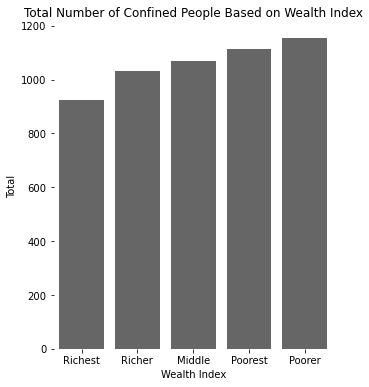

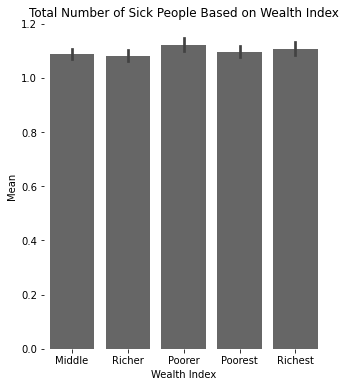

In [42]:
temp = df[["HV270A", "SH221A"]][df.SH221A != '0'].copy()
temp.dropna(inplace=True)
temp['SH221A'] = temp['SH221A'].astype('float')
temp = temp.groupby('HV270A')['SH221A'].sum().reset_index()
temp = temp.sort_values(by='SH221A')

fig, ax = plt.subplots(figsize=(5,6))

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

ax = sns.barplot(data=temp, x="HV270A", y="SH221A", estimator=sum, color='#666666')
plt.title("Total Number of Confined People Based on Wealth Index")
ax.set_xlabel('Wealth Index')
ax.set_ylabel('Total');

temp = df[["HV270A", "SH221A"]][df.SH221A != '0'].copy()
temp.dropna(inplace=True)
temp['SH221A'] = temp['SH221A'].astype('float')

fig, ax = plt.subplots(figsize=(5,6))

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

ax = sns.barplot(data=temp, x="HV270A", y="SH221A", color='#666666')

plt.title("Total Number of Sick People Based on Wealth Index")
ax.set_xlabel('Wealth Index')
ax.set_ylabel('Mean');

#### Distribution Plot for Confined People Based on Wealth Index

Majority in the distribution for confined people is around 1 per household.

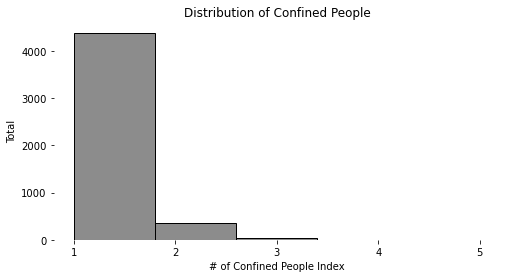

In [43]:
temp = df[["HV270A", "SH221A"]].copy()
temp.dropna(inplace=True)
temp['SH221A'] = temp['SH221A'].astype('float')
temp = temp[temp.SH221A > 0.]

fig, ax = plt.subplots(figsize=(8,4))

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)    

ax =  sns.histplot(data=temp, x="SH221A", bins=5, color='#666666')

plt.title("Distribution of Confined People")
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xlabel('# of Confined People Index')
ax.set_ylabel('Total')

plt.show()

#### Perform One way ANOVA or Analysis of Variance

Again we will set  `𝛼  = 0.05`, and based on the p_value of 0.0987, we also fail to reject the null hypothesis. Therefore, there's no significant difference between the means. However, in case there would be further tests we want to perform, we can do a post hoc test for ANOVA and one of them is `Tukey HSD`.

In [44]:
from scipy.stats import f_oneway

richest = df[(df.HV270A=='Richest') & (df.SH221A.isnull() == False) & (df.SH221A != 0)].SH221A.to_frame()
richer = df[(df.HV270A=='Richer') & (df.SH221A.isnull() == False) & (df.SH221A != 0)].SH221A.to_frame()
middle = df[(df.HV270A=='Middle') & (df.SH221A.isnull() == False) & (df.SH221A != 0)].SH221A.to_frame()
poorest = df[(df.HV270A=='Poorest') & (df.SH221A.isnull() == False) & (df.SH221A != 0)].SH221A.to_frame()
poorer = df[(df.HV270A=='Poorer') & (df.SH221A.isnull() == False) & (df.SH221A != 0)].SH221A.to_frame()

f_oneway(richest, richer, middle, poorer, poorest)

F_onewayResult(statistic=array([1.95385193]), pvalue=array([0.09876447]))

#### Perform Tukey’s HSD Test for Equality of Means Over Multiple Treatments

We will set $\alpha$ = 0.05 and be using `scipy.stats.tukey_hsd` to calculate Tukey's HSD.

Based on the p_values, for each pairing of the test, we fail to reject the null hypothesis which is also expected based on the ANOVA Test. Interestingly, the `p_value` of 0.09 for ANOVA seems to be caused by these pairing 1 (Richer) and 3 (Poorer) with a `p_value` of 0.134.

In [45]:
from scipy.stats import tukey_hsd

r_1 =  [float(s) for s in richest.values.flatten()] 
r_2 =  [float(s) for s in richer.values.flatten()]
r_3 =  [float(s) for s in middle.values.flatten()]
r_4 =  [float(s) for s in poorer.values.flatten()]
r_5 =  [float(s) for s in poorest.values.flatten()]
res = tukey_hsd(r_1, r_2, r_3, r_4, r_5)
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.025     0.539    -0.020     0.070
 (0 - 2)      0.023     0.632    -0.022     0.067
 (0 - 3)     -0.011     0.958    -0.055     0.033
 (0 - 4)      0.014     0.917    -0.031     0.058
 (1 - 0)     -0.025     0.539    -0.070     0.020
 (1 - 2)     -0.002     1.000    -0.045     0.041
 (1 - 3)     -0.036     0.134    -0.079     0.006
 (1 - 4)     -0.012     0.947    -0.054     0.031
 (2 - 0)     -0.023     0.632    -0.067     0.022
 (2 - 1)      0.002     1.000    -0.041     0.045
 (2 - 3)     -0.034     0.182    -0.076     0.008
 (2 - 4)     -0.009     0.977    -0.051     0.033
 (3 - 0)      0.011     0.958    -0.033     0.055
 (3 - 1)      0.036     0.134    -0.006     0.079
 (3 - 2)      0.034     0.182    -0.008     0.076
 (3 - 4)      0.025     0.485    -0.017     0.067
 (4 - 0)     -0.014     0.917    -0.058     0.031
 (4 - 1)      0.012     0.947   

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

temp = df[['HV270A', 'SH221A']].dropna()
temp['SH221A'] = temp['SH221A'].astype(float)

# Ordinary Least Squares (OLS) model
model = ols('SH221A ~ HV270A', data=temp).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
HV270A,0.974944,4.0,2.000923,0.091626
Residual,586.402105,4814.0,NaN,NaN


## Conclusions
 
Using statistical methods like bootstrap, t-test, chi-squared for dependence, and Tukey test, the team was able to prove that there is a significant relationship in the proportion of sick people among poor and non-poor Filipinos. Our analysis aligns with the common intuition that having access to resources would generally lead to healthier lives. What this study highlights are the factors that a government or policy-maker can prioritize to make quick and immediate impact towards helping the less fortunate Filipinos.

There is a significant relationship between Access to Health care facilities and Wealth. This should highlight the need for the government to prioritize the need for better access to healthcare facilities. It can also be due to the poorer families having distrust with the healthcare system and they end up being reluctant to avail of the available health services.

The relationships between the occurence of sickness and sharing of toilets and owning a refridgerator highlight the role of sanitary conditions with health. Better sanitary conditions would lead to better health. But in order to achieve this, a household needs some level of wealth to afford access to a private toilet or owning a refridgerator.

There is a significant relationship between owning a gadget and health. A computer is only a luxury for the households willing to invest in one, so it can be implied that those with computers can also afford good sanitation. Interestingly, households with mobile phones have a significantly larger mean number of sick people than those without one. 

## References

+ Who we are. U.S. Agency for International Development. (2019, October 4). Retrieved December 4, 2022, from https://www.usaid.gov/who-we-are

+ Philippine Statistics Authority. (2022, December 3). Retrieved December 4, 2022, from https://psa.gov.ph/

+ The DHS program. The DHS Program - Quality information to plan, monitor and improve population, health, and nutrition programs. (n.d.). Retrieved December 4, 2022, from https://dhsprogram.com/

+ List of rural health units. Department of Health Eastern Visayas CHD. (n.d.). Retrieved December 4, 2022, from http://ro8.doh.gov.ph/list-of-rural-health-units/

+ Amaresan, S. (2021, November 23). How to analyze survey results like a data pro. HubSpot Blog. Retrieved December 4, 2022, from https://blog.hubspot.com/service/survey-results 

+ How to analyze survey results: Step-by-step guide. Customer Feedback Surveys 🚀 Survicate [Start Free]. (n.d.). Retrieved December 4, 2022, from https://survicate.com/surveys/data-analysis/

+ Neil. (2022, March 13). State clinics barely fill healthcare void in the Philippines. BusinessWorld Online. Retrieved December 4, 2022, from https://www.bworldonline.com/top-stories/2022/03/14/435670/state-clinics-barely-fill-healthcare-void-in-the-philippines/ 